In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [66]:
from sklearn.datasets import fetch_california_housing

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [68]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.count import CountEncoder

# Функции расчета модели и построение графиков

In [69]:
def get_score(data: pd.DataFrame, y: pd.Series, random_state=42, test_size=.2, model_type=None, stand=True):
    
    data = data.copy()
    y = y.copy()
    
    if not model_type:
        if stand:
            model = make_pipeline(
                StandardScaler(),
                LinearRegression()        
            )
        else:
            model = make_pipeline(
                LinearRegression()        
            )
    else:
        if stand:
            model = make_pipeline(
                StandardScaler(),
                model_type
            )
        else:
            model = make_pipeline(
                model_type        
            )
        
    
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=random_state)
    
    model.fit(X_train, y_train)
    
    mse = mean_squared_error(y_test, model.predict(X_test))
    r2 = r2_score(y_test, model.predict(X_test))
    
    score = model.score(X_test, y_test)
    
    return score, mse, r2, model.predict(X_test)

In [70]:
def plots(y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].boxplot(y_pred)
    ax[1].hist(y_pred)
    plt.show()

In [71]:
def corr_heatmap(data):
    sns.heatmap(data.corr(), annot=True)

In [72]:
def zero(d):
    if d < 0:
        return 1
    return d

In [73]:
def log_(d):
    return np.log(d)

In [74]:
def pow_(d):
    return d ** 2

In [75]:
def sqrt_(d):
    return np.sqrt(d)

In [76]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each)
        X = pd.concat([X, dummies], axis=1)
    return X

In [77]:
def get_label(X, cols):
    X = X.copy()
    for each in cols:
        le = LabelEncoder()
        labels = le.fit_transform(X[each])
        X[each] = labels
    return X

In [78]:
def get_count(X, cols):
    X = X.copy()
    
    for col in cols:
        X[col] = X[col].astype('str')

    ce = CountEncoder(handle_unknown=-1)
    ce.fit(X[cols])
    X[cols] = ce.transform(X[cols])
    return X

# Подготовка датасета

In [79]:
df = fetch_california_housing(as_frame=True)
data = df.frame

In [80]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [81]:
data.info()
#1.4 Мб памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [82]:
data.Population = data.Population.apply(zero)

In [83]:
cols_i16 = ['HouseAge', 'Population']
for col in cols_i16:
    data[col] = data[col].astype(np.int16)
cols_f16 = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
for col in cols_f16:
    data[col] = data[col].astype(np.float16)

In [84]:
data.info()
# 363 кб памяти (меньше почти в 4 раза)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float16
 1   HouseAge     20640 non-null  int16  
 2   AveRooms     20640 non-null  float16
 3   AveBedrms    20640 non-null  float16
 4   Population   20640 non-null  int16  
 5   AveOccup     20640 non-null  float16
 6   Latitude     20640 non-null  float16
 7   Longitude    20640 non-null  float16
 8   MedHouseVal  20640 non-null  float16
dtypes: float16(7), int16(2)
memory usage: 362.9 KB


In [85]:
y = data.MedHouseVal
del data['MedHouseVal']

# Расчет регрессии без манипуляций

In [86]:
# Без стандартизации
score, mse, r2, y_pred = get_score(data, y, stand=False)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5758705326700009
MSE = 0.555743932723999
R2 = 0.5758705326700009


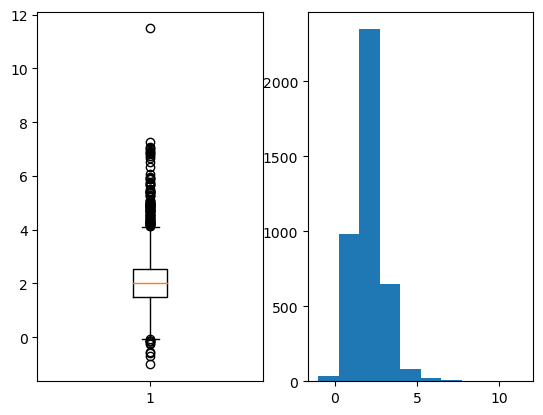

In [87]:
plots(y_pred)

In [88]:
# Со стандартизацией
score, mse, r2, y_pred = get_score(data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5758703976372199
MSE = 0.5557441115379333
R2 = 0.5758703976372199


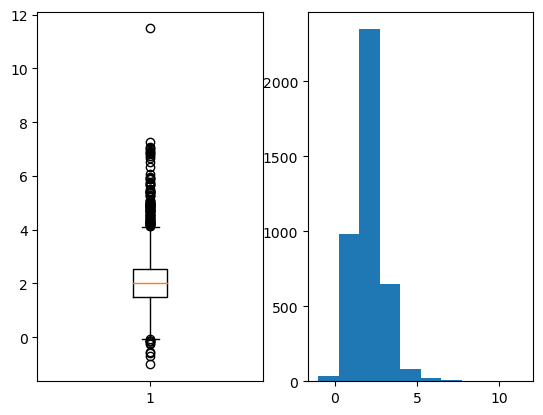

In [89]:
plots(y_pred)

Различие в параметре R2 - составляет только в 7 знаке после запятой, далее - со стандартизацией  
Стоит отметить наличие одного выброса около 12

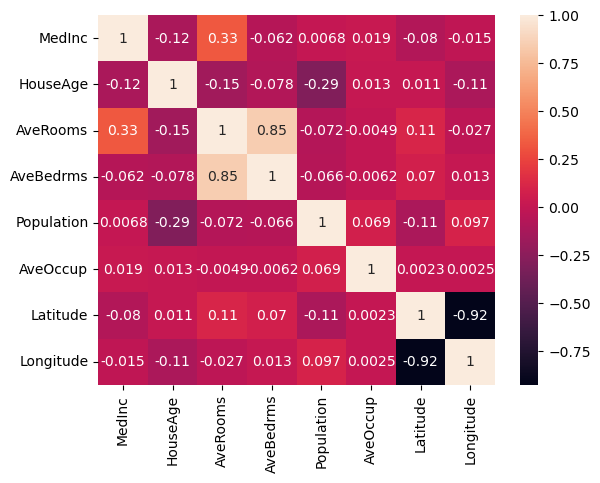

In [90]:
corr_heatmap(data)

Высокая корреляция наблюдается между показателями Среднего колличества спален и комнат, а также между координатами.  
Удалим среднее количество спален

# Удаление среднего количества спален

In [91]:
drop_data = data.copy()
drop_data = drop_data.drop(columns=['AveBedrms'])

In [92]:
# Было: R2 = 0.5758703976372199

score, mse, r2, y_pred = get_score(drop_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5823348769525658
MSE = 0.5472735166549683
R2 = 0.5823348769525658


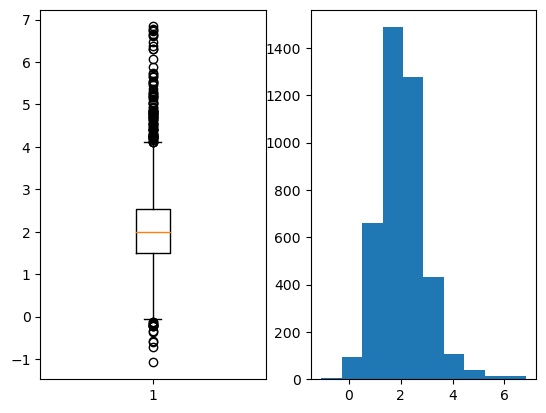

In [93]:
plots(y_pred)

Выброс исчез, при этом также стоит заметить, что значение СКО уменьшилось, а R2 увеличился

# Логарифмирование населения

In [94]:
log_data = drop_data.copy()
log_data.Population = log_data.Population.apply(zero)
log_data.Population = log_data.Population.apply(log_)

In [95]:
# Было: R2 = 0.5823348769525658

score, mse, r2, y_pred = get_score(log_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5826058398855867
MSE = 0.5469185031381486
R2 = 0.5826058398855867


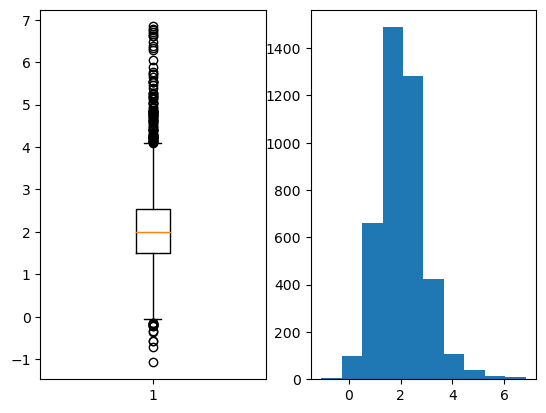

In [96]:
plots(y_pred)

Значение СКО незначительно уменьшилось, а R2 незначительно увеличился

# Возведение в степень 2 Среднего населения квартиры

In [97]:
power_data = log_data.copy()
power_data.AveOccup = power_data.AveOccup.apply(pow_)

In [98]:
# Было: R2 = 0.5826058398855867

score, mse, r2, y_pred = get_score(power_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5817088012292074
MSE = 0.5480939077941924
R2 = 0.5817088012292074


Значение R2 уменьшилось, далее эту манипуляцию не пускаем. 

# Квадратный корень от Средней стоимости

In [99]:
sqrt_data = log_data.copy()
sqrt_data.MedInc = sqrt_data.MedInc.apply(sqrt_)

In [100]:
# Было: R2 = 0.5826058398855867

score, mse, r2, y_pred = get_score(sqrt_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5734177274273025
MSE = 0.5589578395557264
R2 = 0.5734177274273025


Значение R2 уменьшилось, далее эту манипуляцию не пускаем. 

# Создание новых признаков

In [101]:
new_data = log_data.copy()

In [102]:
# Количество комнат на количество людей в квартире
new_data['Room_per_Occup'] = new_data.AveRooms / new_data.AveOccup

In [103]:
# Было: R2 = 0.5826058398855867

score, mse, r2, y_pred = get_score(new_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.6428065115812205
MSE = 0.4680365627615462
R2 = 0.6428065115812205


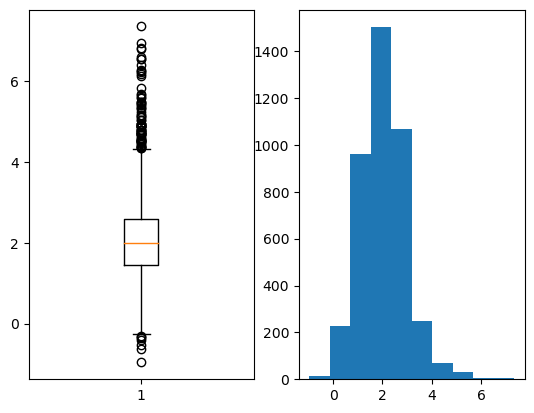

In [104]:
plots(y_pred)

Появились выбросы, но при этом значение R2 увеличилось значительно, а СКО - наоборот хорошо уменбшилось.  
Попробуем сделать новые признаки

In [105]:
# Средняя стоимость от возраста здания
new_data['Lat_lon'] = new_data.Latitude / new_data.Longitude

In [106]:
# Было: R2 = 0.6428065115812205

score, mse, r2, y_pred = get_score(new_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.6434139296236909
MSE = 0.4672406528080481
R2 = 0.6434139296236909


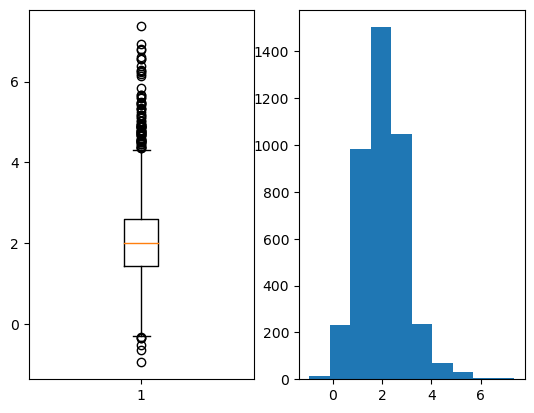

In [107]:
plots(y_pred)

Добавление отношения долготы к широте значение R2 увеличилось, а СКО - снизилось

In [108]:
new_drop_data = new_data.copy()
new_drop_data = new_drop_data.drop(columns=['Latitude', 'Longitude'])

In [109]:
score, mse, r2, y_pred = get_score(new_drop_data, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.5865238414084908
MSE = 0.541784680643813
R2 = 0.5865238414084908


Удаление Долготы и Широты приводит к ухудшению качества модели. 

# Создание новых признаков при помощи специальных методов

In [110]:
new_data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Room_per_Occup,Lat_lon
0,8.328125,41,6.984375,5.774552,2.554688,37.87500,-122.2500,2.734375,-0.309814
1,8.304688,21,6.238281,7.783641,2.109375,37.87500,-122.2500,2.957031,-0.309814
2,7.257812,52,8.289062,6.206576,2.802734,37.84375,-122.2500,2.957031,-0.309570
3,5.644531,52,5.816406,6.324359,2.548828,37.84375,-122.2500,2.281250,-0.309570
4,3.845703,52,6.281250,6.336826,2.181641,37.84375,-122.2500,2.878906,-0.309570
...,...,...,...,...,...,...,...,...,...
20635,1.560547,25,5.046875,6.739337,2.560547,39.46875,-121.0625,1.970703,-0.325928
20636,2.556641,18,6.113281,5.874931,3.123047,39.50000,-121.1875,1.957031,-0.325928
20637,1.700195,17,5.207031,6.914731,2.326172,39.43750,-121.2500,2.238281,-0.325195
20638,1.867188,18,5.328125,6.608001,2.123047,39.43750,-121.3125,2.509766,-0.325195


In [111]:
new_data_1 = get_one_hot(new_data, ['HouseAge'])

In [112]:
# Было: R2 = 0.6428065115812205

score, mse, r2, y_pred = get_score(new_data_1, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.6457536939625501
MSE = 0.46417482071889254
R2 = 0.6457536939625501


Значение R2 выростает в случае применения метода one_hot на признак возраста дома

In [113]:
new_data_2 = get_label(new_data, ['HouseAge'])

In [114]:
# Было: R2 = 0.6457536939625501

score, mse, r2, y_pred = get_score(new_data_2, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.6434139296236909
MSE = 0.4672406528080481
R2 = 0.6434139296236909


Значение R2 уменьшается в случае применения метода label на признак возраста дома

In [115]:
new_data_3 = get_count(new_data_1, ['Lat_lon'])

In [116]:
# Было: R2 = 0.6457536939625501

score, mse, r2, y_pred = get_score(new_data_3, y, stand=True)
print(f'Score = {score}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')

Score = 0.6518263085949565
MSE = 0.45621777286757603
R2 = 0.6518263085949565


Дополнительное воздействие метода на признак Lat_lon позволяет еще повысить значение R2

# Выводы

Были сделаны следующие манипуляции:
1. Удаление значений с высокой корреляцией
2. Логарифмирование признаков
3. Создание новых признаков исходя из манипуляций с имеющимися
4. Методы one_hot и count

In [117]:
final_data = pd.DataFrame({
    'MSE': {'Base': 0.55574, 'Drop': 0.54727, 'Log': 0.54691, 'New': 0.46724, 'one_hot': 0.46417, 'count': 0.45621},
    'R2': {'Base': 0.57587, 'Drop': 0.58233, 'Log': 0.58260, 'New': 0.64280, 'one_hot': 0.64575, 'count': 0.65182},
})

In [118]:
final_data

,MSE,R2
Base,0.55574,0.57587
Drop,0.54727,0.58233
Log,0.54691,0.58260
New,0.46724,0.64280
one_hot,0.46417,0.64575
count,0.45621,0.65182


Правильный выбор действий с признаками позволяет повысить качество модели и ее точность

# Часть 2. Деревья решений

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
list_depth = [1,2,3,4,5,7]

dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X, y)

dt_regs['depth=inf'] = DecisionTreeRegressor(random_state=10).fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, random_state=10).fit(X, y)

NameError: name 'X' is not defined